<h1>Group Project: considerations on demographic of self-taught coders</h1>
<br><br>
<h2>Introduction</h2>
<p align="justify">
With the purpose of understanding a bit better the profile of self-taught online students that are part of the “Learn to Code” movement the Team 39 agreed that we would use data freely available on Kaggle platform, made available by freeCodeCamp to understand different profiles presented and find relevant trends to understand strong influence that trend alrady have and help finding "niches" where engagement can be reinforced in order to broaden the reach of movement.
</p>
<br>
<h2>Data analysed</h2>
<p align="justify">For this study we will use data made available online by freeCodeCamp (https://github.com/freeCodeCamp/2016-new-coder-survey ).
The survey was designed by CodeNewbie and Free Code Camp as an anonymous 5-minute survey, to with more than 15,000 participants from 169 countries have answered to from March 28 through May 2 (2016).
The 2016 New Coder Survey is made available under the Open Database License: http://opendatacommons.org/licenses/odbl/1.0/. Any rights in individual contents of the database are licensed under the Database Contents License: http://opendatacommons.org/licenses/dbcl/1.0/
</p>
<br>
<h2>Definition of activities</h2>
<p align="justify">Udacity Data Scholars beneficiaries of Bertelsmann Data Science Challenge Scholarship Course and participants of Team 39 listed different interesting aspects that could be derived from questions available on survey, the suggestions were voted and top three divided between each of three subgroups, as follows:
</p>

|<p align="center">Question<br>IDs</p>|<p align="left">Topic</p>|<p align="left">Subgroup</p>|
|-----|--------------------|----------|
|<p align="center"> 1.09; 2.04; 2.08</p>|<p align="justify">Questions “2.08. What’s the highest degree or level of school you have completed? (If currently enrolled, highest degree received.)”, “1.09: Which learning resources have you found helpful?” and “2.04: Which country do you currently live in?”</p>|<p align="left">Butterflies - Isabel Martinez (IM), Kara de la Marck (KM), Loretta Rehm (LR), Nelly Hilmane (NH)</p>|
|<p align="center">1.01; 1.03; 1.09</p>|<p align="justify">1.01. Are you already working as a software developer? 1.03. Which one of these roles are you most interested in? 1.09. Which learning resources have you found helpful?- To determine the popularity of online courses/self study.</p>|<p align="left">Dragonflies - Kashan Khan (K.K), Mohamed Hassona (MH), Ramya Kameshwar (RK)</p>|
|<p align="center">1.11; 2.01; 2.02</p>|<p align="justify">2.01. compare age, 2.02. gender to 1.11. hours spent studying</p>|<p align="left">Ladybirds - Ana Porubova (AP), Ana Sustic (AS), Elena Lestini (EL), Rudo N Takavarasha (RNT)</p>|

<p align="justify">
<h3>Questions from survey that were analysed after subgroup reviewed the data are:</h3>
<br>
1.09: Which learning resources have you found helpful?<br>
2.04: Which country do you currently live in?<br>
2.08: What's the highest degree or level of school you have completed? (If currently enrolled, highest degree received.)
<br><br>
With the purpose to highlight the variance on level of education of people using online courses (resources) included in the survey.
</p>

In [194]:
#Import libraries needed
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [195]:
#Set dataframe with csv (buffering due to size)
rawURL = 'https://raw.githubusercontent.com/freeCodeCamp/2016-new-coder-survey/master/clean-data/2016-FCC-New-Coders-Survey-Data.csv'
reader = pd.read_csv(rawURL, sep = ',', dtype = str, iterator=True, chunksize=10000, engine = 'python', encoding = 'utf-8')
df = pd.concat(reader,ignore_index = True)

#Columns to consider
selected_columns = ["ID.x","CountryLive","SchoolDegree",
                    "ResourceBlogs","ResourceBooks","ResourceCodecademy","ResourceCodeWars","ResourceCoursera",
                    "ResourceDevTips","ResourceEdX","ResourceEggHead","ResourceFCC","ResourceGoogle",
                    "ResourceHackerRank","ResourceKhanAcademy","ResourceLynda","ResourceMDN","ResourceOdinProj",
                    "ResourceOther","ResourcePluralSight","ResourceReddit","ResourceSkillCrush","ResourceSoloLearn",
                    "ResourceStackOverflow","ResourceTreehouse","ResourceUdacity","ResourceUdemy","ResourceW3Schools",
                    "ResourceYouTube"]

df_selected = df.loc[:,selected_columns]
print(len(df_selected)) # 15620
df_selected = df_selected[df_selected['CountryLive'] != 'nan']
df_selected = df_selected[df_selected['SchoolDegree'] != 'nan']
print(len(df_selected)) # 13506

15620
13506


In [196]:
#Variables
resource_count = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
resource_high = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
resource_low = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
resource_other = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

def clean_list(list_to_clean, value=0):
    for i in range(len(list_to_clean)):
        list_to_clean[i] = value

In [197]:
#Functions
def category_education(degree):
    #Group degrees into two categories
    high_eduction = ["associate's degree","bachelor's degree","master's degree (non-professional)","professional degree (MBA, MD, JD, etc.)","Ph.D."]
    
    if(degree in high_eduction):
        return "High-Education"
    else:
        return "Low-Education"

def count_degree_level(level, i):
    #print(level+'-'+str(i))
    if (level == 'High-Education'):
        resource_high[i] += 1
    elif (level == 'Low-Education'):
        resource_low[i] += 1
    else:
        resource_other[i] += 1
        
def total_resources(row):
    total_resource = 0
    #print("row['ResourceBlogs']: " + str(row['ResourceBlogs']))
    if row['ResourceBlogs'] == '1' :
        total_resource += 1
        resource_count[0] += 1
        count_degree_level(row['GroupEducation'],0)
    if row['ResourceBooks'] == '1' :
        total_resource += 1
        resource_count[1] += 1
        count_degree_level(row['GroupEducation'],1)
    if row['ResourceCodecademy'] == '1' :
        total_resource += 1
        resource_count[2] += 1
        count_degree_level(row['GroupEducation'],2)
    if row['ResourceCodeWars'] == '1' :
        total_resource += 1
        resource_count[3] += 1
        count_degree_level(row['GroupEducation'],3)
    if row['ResourceCoursera'] == '1' :
        total_resource += 1
        resource_count[4] += 1
        count_degree_level(row['GroupEducation'],4)
    if row['ResourceDevTips'] == '1' :
        total_resource += 1
        resource_count[5] += 1
        count_degree_level(row['GroupEducation'],5)
    if row['ResourceEdX'] == '1' :
        total_resource += 1
        resource_count[6] += 1
        count_degree_level(row['GroupEducation'],6)
    if row['ResourceEggHead'] == '1' :
        total_resource += 1
        resource_count[7] += 1
        count_degree_level(row['GroupEducation'],7)
    if row['ResourceFCC'] == '1' :
        total_resource += 1
        resource_count[8] += 1
        count_degree_level(row['GroupEducation'],8)
    if row['ResourceGoogle'] == '1' :
        total_resource += 1
        resource_count[9] += 1
        count_degree_level(row['GroupEducation'],9)
    if row['ResourceHackerRank'] == '1' :
        total_resource += 1
        resource_count[10] += 1
        count_degree_level(row['GroupEducation'],10)
    if row['ResourceKhanAcademy'] == '1' :
        total_resource += 1
        resource_count[11] += 1
        count_degree_level(row['GroupEducation'],11)
    if row['ResourceLynda'] == '1' :
        total_resource += 1
        resource_count[12] += 1
        count_degree_level(row['GroupEducation'],12)
    if row['ResourceMDN'] == '1' :
        total_resource += 1
        resource_count[13] += 1
        count_degree_level(row['GroupEducation'],13)
    if row['ResourceOdinProj'] == '1' :
        total_resource += 1
        resource_count[14] += 1
        count_degree_level(row['GroupEducation'],14)
    if row['ResourceOther'] != 'nan' :
        total_resource += 1
        resource_count[15] += 1
        count_degree_level(row['GroupEducation'],15)
    if row['ResourcePluralSight'] == '1' :
        total_resource += 1
        resource_count[16] += 1
        count_degree_level(row['GroupEducation'],16)
    if row['ResourceReddit'] == '1' :
        total_resource += 1
        resource_count[17] += 1
        count_degree_level(row['GroupEducation'],17)
    if row['ResourceSkillCrush'] == '1' :
        total_resource += 1
        resource_count[18] += 1
        count_degree_level(row['GroupEducation'],18)
    if row['ResourceSoloLearn'] == '1' :
        total_resource += 1
        resource_count[19] += 1
        count_degree_level(row['GroupEducation'],19)
    if row['ResourceStackOverflow'] == '1' :
        total_resource += 1
        resource_count[20] += 1
        count_degree_level(row['GroupEducation'],20)
    if row['ResourceTreehouse'] == '1' :
        total_resource += 1
        resource_count[21] += 1
        count_degree_level(row['GroupEducation'],21)
    if row['ResourceUdacity'] == '1' :
        total_resource += 1
        resource_count[22] += 1
        count_degree_level(row['GroupEducation'],22)
    if row['ResourceUdemy'] == '1' :
        total_resource += 1
        resource_count[23] += 1
        count_degree_level(row['GroupEducation'],23)
    if row['ResourceW3Schools'] == '1' :
        total_resource += 1
        resource_count[24] += 1
        count_degree_level(row['GroupEducation'],24)
    if row['ResourceYouTube'] == '1' :
        total_resource += 1
        resource_count[25] += 1
        count_degree_level(row['GroupEducation'],25)

    return total_resource

def feed_variables(data_frame, description):

    #Rebuild index
    data_frame = data_frame.reset_index(drop=True)
    #print(data_frame)
        
    #Include degree categorization
    data_frame['GroupEducation'] = data_frame.apply(lambda row: category_education(row['SchoolDegree']), axis=1)
    #print(data_frame)
    
    #Clean lists for sums
    clean_list(resource_count)
    clean_list(resource_high)
    clean_list(resource_low)
    clean_list(resource_other)
    
    #print('\nResource Count: ' + str(resource_count))
    #print('\nResource High: ' + str(resource_high))
    #print('\nResource Low: ' + str(resource_low))
    #print('\nResource Other: ' + str(resource_other))
    
    #Create column with sum of resources used
    data_frame['TotalResources'] = data_frame.apply(lambda row: total_resources(row), axis=1)
    #print(data_frame)
    
    #Print statistic data
    se_total_education = data_frame['TotalResources']
    print('Total Resources - ' + description + ':\n')
    print(se_total_education.describe(include=[np.number]))

    df_high_education = data_frame[data_frame.GroupEducation == 'High-Education']
    se_high_education = df_high_education['TotalResources']
    print('\nTotal Resources for High Education - ' + description + ':\n')
    print(se_high_education.describe(include=[np.number]))

    df_low_education = data_frame[data_frame.GroupEducation == 'Low-Education']
    se_low_education = df_low_education['TotalResources']
    print('\nTotal Resources for Low Education - ' + description + ':\n')
    print(se_low_education.describe(include=[np.number]))
    
    #Describe only Udacity
    df_udacity_total = data_frame[data_frame.ResourceUdacity == '1']
    se_udacity_total = df_udacity_total['TotalResources']
    print('\nTotal Resources for Udacity Students - ' + description + ':\n')
    print(se_udacity_total.describe(include=[np.number]))
    
    df_udacity_high_education = data_frame[data_frame.GroupEducation == 'High-Education']
    df_udacity_high_education = df_udacity_high_education[df_udacity_high_education.ResourceUdacity == '1']
    se_udacity_high_education = df_udacity_high_education['TotalResources']
    print('\nTotal Resources for High Education (Udacity Students) - ' + description + ':\n')
    print(se_udacity_high_education.describe(include=[np.number]))

    df_udacity_low_education = data_frame[data_frame.GroupEducation == 'Low-Education']
    df_udacity_low_education = df_udacity_low_education[df_udacity_low_education.ResourceUdacity == '1']
    se_udacity_low_education = df_udacity_low_education['TotalResources']
    print('\nTotal Resources for Low Education (Udacity Students) - ' + description + ':\n')
    print(se_udacity_low_education.describe(include=[np.number]))
    
    #Prepare Titles
    columns_titles = [column.replace('Resource','') for column in list(data_frame.columns)]
    labels = columns_titles[3:-2]
    
    #print('\nColumns Titles: ' + str(columns_titles))
    #print('\nLabels: ' + str(labels))
    
    #print('\nResource Count: ' + str(resource_count))
    #print('\nResource High: ' + str(resource_high))
    #print('\nResource Low: ' + str(resource_low))
    #print('\nResource Other: ' + str(resource_other))
    
    return se_total_education, se_high_education, se_low_education, labels

#Histogram
def create_histogram(description, df_total_education, df_high_education, df_low_education, labels):
    plt.figure(figsize=(15,5))
    bins = [x//2 for x in range(len(labels))]
    plt.hist(df_total_education, bins, histtype='step',stacked = True, rwidth = 0.8, label='Total', color='#000066')
    plt.hist(df_high_education, bins, histtype='bar', stacked = True, rwidth = 0.6, label='High-Education', color = '#3366FF')
    plt.hist(df_low_education, bins, histtype='bar', stacked = True, rwidth = 0.4, label='Low-Education', color = '#99CCFF')
    plt.xlabel('Number of resources utilised')
    plt.ylabel('Frequency')
    plt.title('Histogram of resources - ' + description)
    plt.grid(False)
    plt.legend()
    plt.show()
    
#Bar graph
def create_bar_graph(description, df_total_education, df_high_education, df_low_education, labels):
    
    #print(labels)
    #print(counts)
    #totals = dict(zip(labels, resource_count, resource_high, resource_low))
    #print(totals)
    #sort_list = sorted(totals.items(), key=lambda x:x[1], reverse=True)
    #graph_labels, graph_count, graph_high, graph_low = []
    #for resource, count_resource in top10:
    #    top10_labels.append(resource)
    #    top10_count_resource.append(count_resource)
    
    plt.figure(figsize=(15,5))
    x_bar = [i for i, _ in enumerate(labels)]
    plt.bar(x_bar, resource_count, width = 0.80, edgecolor = '#000066', facecolor = 'w', label='Total')
    plt.bar(x_bar, resource_high, width = 0.60, color = '#3366FF', label='High-Education')
    plt.bar(x_bar, resource_low, width = 0.40, color = '#99CCFF', label='Low-Education')
    plt.xlabel('By resource')
    plt.ylabel('Number of people')
    plt.xticks(x_bar, labels, rotation='vertical')
    plt.legend()
    plt.title('Barplot resources usage - ' + description)
    plt.grid(True, color = '#CCCCCC')
    plt.show()

<h2>United States and Canada</h2>

In [198]:
#Select only CountryLive that do not belong to Latin America group
usa_canada = ['Canada','United States of America','Virgin Islands (USA)']

#Remove all countries not listed as in Latin America
df_selected_USA_Canada = df_selected[df_selected.CountryLive.isin(usa_canada)]

df_total_education, df_high_education, df_low_education, labels = feed_variables(df_selected_USA_Canada, 'United States of America and Canada')

Total Resources - United States of America and Canada:

count    6781.000000
mean        3.331662
std         1.877718
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        15.000000
Name: TotalResources, dtype: float64

Total Resources for High Education - United States of America and Canada:

count    4518.000000
mean        3.306552
std         1.858179
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: TotalResources, dtype: float64

Total Resources for Low Education - United States of America and Canada:

count    2263.000000
mean        3.381794
std         1.915562
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        15.000000
Name: TotalResources, dtype: float64

Total Resources for Udacity Students - United States of America and Canada:

count    1351.000000
mean        5.134715
std         1.953436
min         1.000000
25%         4.00

<p align="justify">
<h3>Conclusion 1:</h3>
We can see from statistic data above that between high-level education and low-level education in Canada and United States of America the difference is not significant but people with low-education tend to use 2% more resources that people with high-level education (by comparing the means listed above). Below the histogram with comparison between high and low level education.
</p>
<p align="justify">
<h3>Conclusion 2:</h3>
We can see from graphic below that in Canada and United States of America Udacity is on 7th Place.
</p>

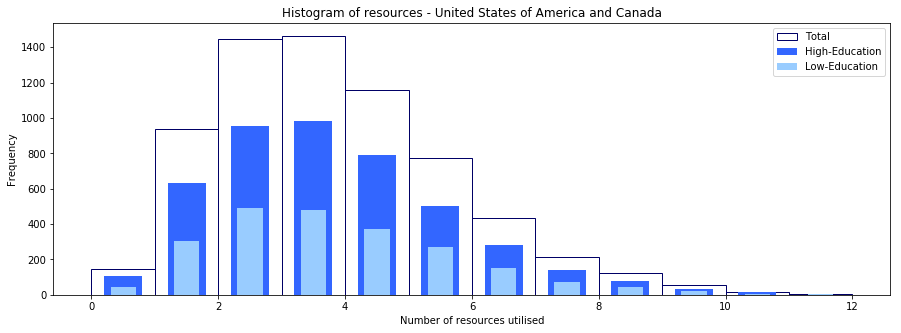

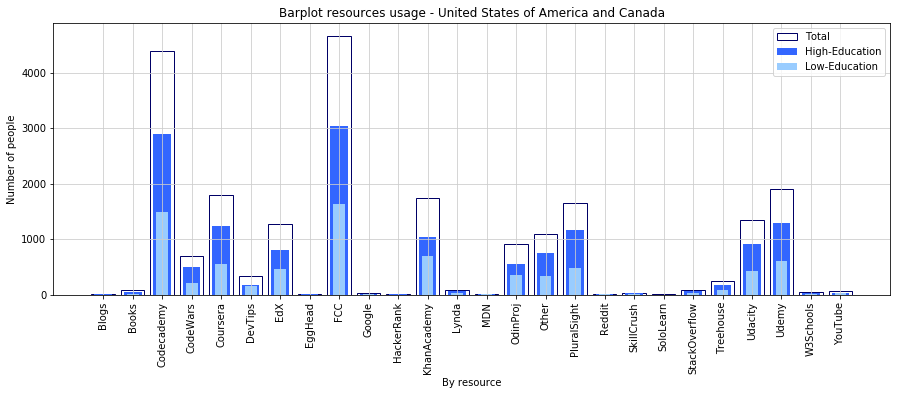

In [199]:
create_histogram('United States of America and Canada', df_total_education, df_high_education, df_low_education, labels)
create_bar_graph('United States of America and Canada', df_total_education, df_high_education, df_low_education, labels)

<h2>Other American Countries</h2>

In [200]:
#Select only CountryLive that do not belong to Latin America group
other_america = ['Bahamas','Barbados','Belize','Bermuda','Jamaica','Suriname','Trinidad & Tobago','Virgin Islands (British)']

#Remove all countries not listed as in Latin America
df_selected_Other_America = df_selected[df_selected.CountryLive.isin(other_america)]

df_total_education, df_high_education, df_low_education, labels = feed_variables(df_selected_Other_America, 'Other America')

Total Resources - Other America:

count    31.000000
mean      3.354839
std       1.992459
min       0.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       8.000000
Name: TotalResources, dtype: float64

Total Resources for High Education - Other America:

count    17.000000
mean      4.176471
std       1.911652
min       2.000000
25%       3.000000
50%       4.000000
75%       6.000000
max       8.000000
Name: TotalResources, dtype: float64

Total Resources for Low Education - Other America:

count    14.000000
mean      2.357143
std       1.645841
min       0.000000
25%       1.000000
50%       2.000000
75%       3.750000
max       5.000000
Name: TotalResources, dtype: float64

Total Resources for Udacity Students - Other America:

count    9.000000
mean     5.333333
std      2.121320
min      1.000000
25%      4.000000
50%      6.000000
75%      7.000000
max      8.000000
Name: TotalResources, dtype: float64

Total Resources for High Education (Udacity Students) 

<p align="justify">
<h3>Conclusion 3:</h3>
We can see from statistic data above that between high-level education and low-level education in the countries that are not United States of America, Canada or part of Latin America the difference very significant showing that people with high-education in average use 77% more resources that people with low-level education (by comparing the means listed above). Below the histogram with comparison between high and low level education.
</p>
<p align="justify">
<h3>Conclusion 4:</h3>
We can see from graphic below that in the countries that are not United States of America, Canada or part of Latin America Udacity is on 5th Place.
</p>

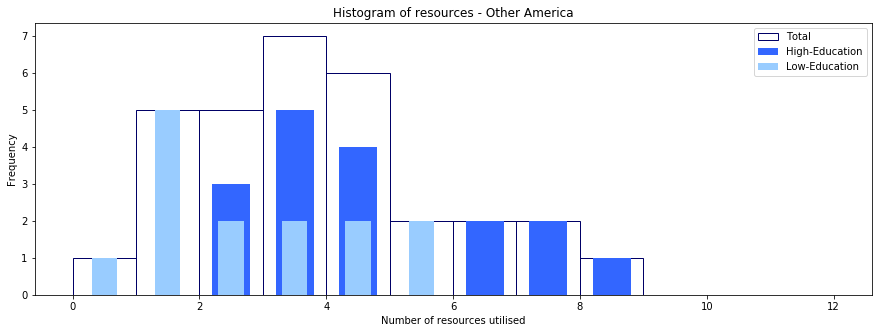

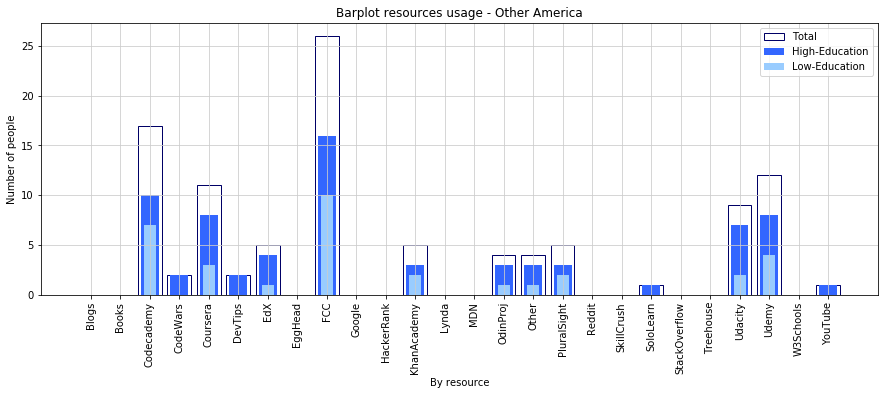

In [201]:
create_histogram('Other America', df_total_education, df_high_education, df_low_education, labels)
create_bar_graph('Other America', df_total_education, df_high_education, df_low_education, labels)

<h2>Latin America</h2>

In [202]:
#Select only CountryLive that belong to Latin America group
latin_america = ['Argentina','Bolivia','Brazil','Chile','Colombia','Costa Rica','Cuba','Dominican Republic','Ecuador','El Salvador','Guatemala','Guyana','Haiti','Honduras','Martinique',
        'Mexico','Nicaragua','Panama','Paraguay','Peru','Puerto Rico','Uruguay','Venezuela']

#Remove all countries not listed as in Latin America
df_selected_Latin_America = df_selected[df_selected.CountryLive.isin(latin_america)]
#print(len(df_selected_Latin_America))
df_total_education, df_high_education, df_low_education, labels = feed_variables(df_selected_Latin_America, 'Latin America')

Total Resources - Latin America:

count    673.000000
mean       3.823180
std        2.035386
min        0.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       11.000000
Name: TotalResources, dtype: float64

Total Resources for High Education - Latin America:

count    363.000000
mean       3.674931
std        1.947971
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       11.000000
Name: TotalResources, dtype: float64

Total Resources for Low Education - Latin America:

count    310.000000
mean       3.996774
std        2.123224
min        0.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       11.000000
Name: TotalResources, dtype: float64

Total Resources for Udacity Students - Latin America:

count    188.000000
mean       5.537234
std        1.905157
min        2.000000
25%        4.000000
50%        5.000000
75%        6.000000
max       11.000000
Name: TotalResources, dtype: float64

Total Resource

<p align="justify">
<h3>Conclusion 5:</h3>
We can see from statistic data above that between high-level education and low-level education in the countries that are part of Latin America the difference is not significant but people with low-education tend to use 8% more resources that people with high-level education (by comparing the means listed above). Below the histogram with comparison between high and low level education.
</p>
<p align="justify">
<h3>Conclusion 6:</h3>
We can see from graphic below that in the countries that are on Latin America Udacity is on 7th Place.
</p>

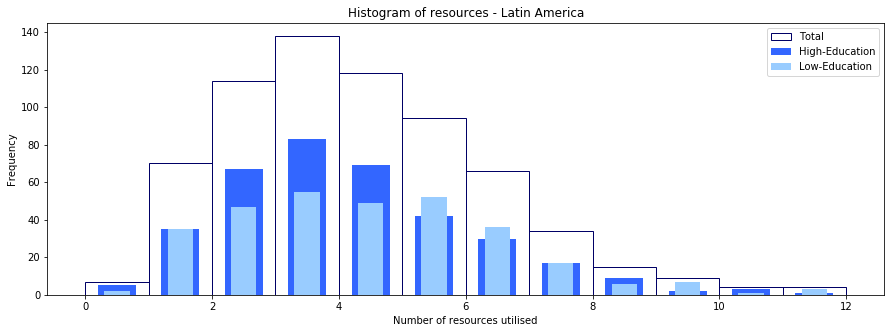

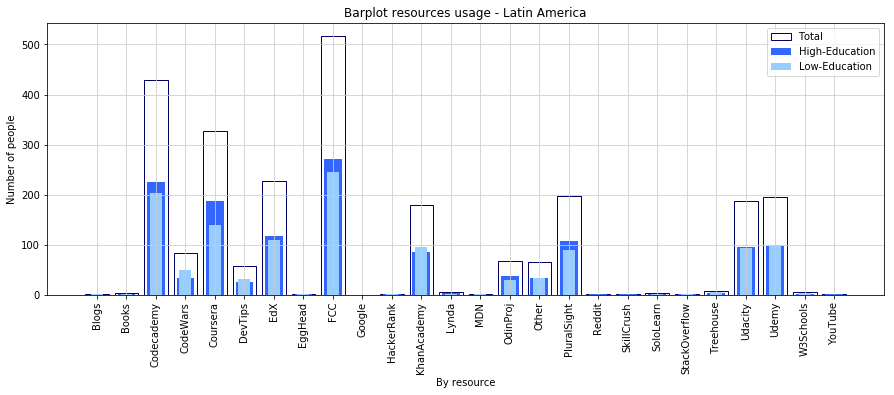

In [203]:
create_histogram('Latin America', df_total_education, df_high_education, df_low_education, labels)
create_bar_graph('Latin America', df_total_education, df_high_education, df_low_education, labels)

<h2>Global</h2>

In [204]:
df_total_education, df_high_education, df_low_education, labels = feed_variables(df_selected, 'Global')

Total Resources - Global:

count    13506.000000
mean         3.333185
std          1.906451
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         15.000000
Name: TotalResources, dtype: float64

Total Resources for High Education - Global:

count    8491.000000
mean        3.304911
std         1.863656
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: TotalResources, dtype: float64

Total Resources for Low Education - Global:

count    5015.000000
mean        3.381057
std         1.976063
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        15.000000
Name: TotalResources, dtype: float64

Total Resources for Udacity Students - Global:

count    2904.000000
mean        5.168388
std         1.973355
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        15.000000
Name: TotalResources, dtype: float64

To

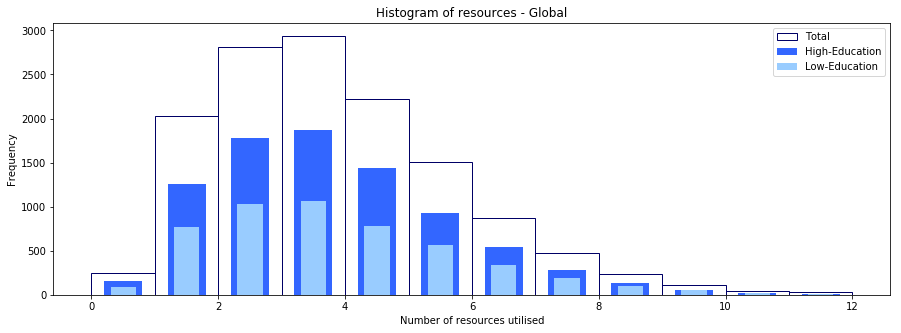

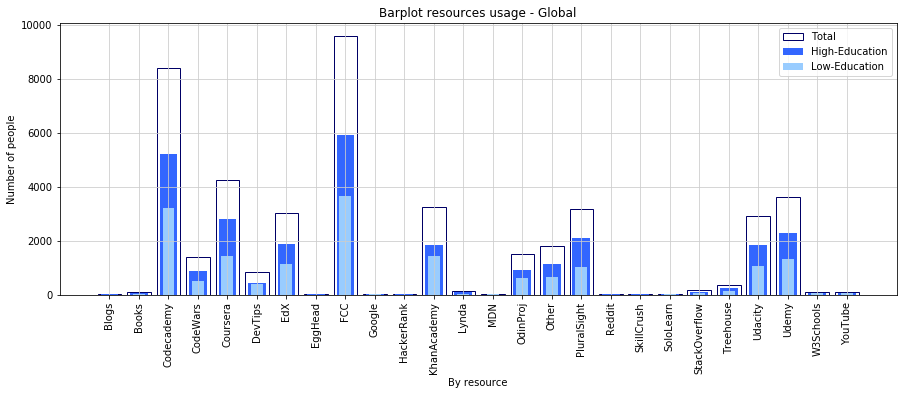

In [205]:
create_histogram('Global', df_total_education, df_high_education, df_low_education, labels)
create_bar_graph('Global', df_total_education, df_high_education, df_low_education, labels)

In [209]:
#Sort and take top 5
#Transform lists in dictionaries
#print(labels)
#print(resource_count)
global_totals = dict(zip(labels, resource_count))
#print(global_totals)
top10 = sorted(global_totals.items(), key=lambda x:x[1], reverse=True)
top10_labels = []
top10_count_resource = []
for resource, count_resource in top10:
    top10_labels.append(resource)
    top10_count_resource.append(count_resource)
#print(top10_labels[:10])
#print(top10_count_resource[:10])

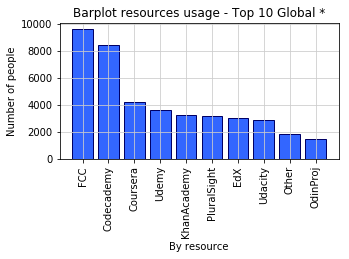

In [208]:
#Create top 5 barplot
plt.figure(figsize=(5,2.5))
x_bar = [i for i, _ in enumerate(top10_labels[:10])]
plt.bar(x_bar, top10_count_resource[:10], width = 0.80, edgecolor = '#000066', facecolor = '#3366FF', label='Total')
plt.xlabel('By resource')
plt.ylabel('Number of people')
plt.xticks(x_bar, top10_labels[:10], rotation='vertical')
plt.title('Barplot resources usage - Top 10 Global *')
plt.grid(True, color = '#CCCCCC')
plt.show()